We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-23 12:45:17--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.44, 13.227.198.83, 13.227.198.98, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.44|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-04-23 12:45:17 ERROR 404: Not Found.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [8]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [9]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-04-18,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-04-17,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0,Asia


Use a count on columns to see how many missing values we have. We would like to compare countries by geoId.

In [10]:
df.count()

dateRep                    12596
day                        12596
month                      12596
year                       12596
cases                      12596
deaths                     12596
countriesAndTerritories    12596
geoId                      12556
countryterritoryCode       12462
popData2018                12493
continentExp               12596
dtype: int64

Because we seem to miss some geoID entries, we will drop them. The resulting dataframe will be pivoted so we get one row per date, columns by geoId and the number of new cases and deaths in the cells. Again, show the first 10 rows to check our pivot.

In [11]:
df_geo = df.dropna().pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                           ... deaths          \
geoId         AD   AE   AF  AG  AL   AM  AO  AR   AT   AU  ...     VC  VE  VG   
dateRep                                                    ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 400 columns]

Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to see what's there.

In [12]:
df_geo.describe()

cases                                                            \
geoId         AD          AE          AF         AG         AL          AM   
count  41.000000  109.000000  105.000000  35.000000  46.000000  106.000000   
mean   17.634146   75.577982   11.200000   0.685714  13.782609   14.367925   
std    12.509509  153.554448   21.066013   1.430167   8.156560   22.544908   
min     0.000000    0.000000    0.000000   0.000000   0.000000    0.000000   
25%     8.000000    0.000000    0.000000   0.000000   7.250000    0.000000   
50%    16.000000    0.000000    0.000000   0.000000  12.500000    0.000000   
75%    25.000000   16.000000   10.000000   0.500000  20.750000   26.000000   
max    43.000000  490.000000   88.000000   6.000000  29.000000   92.000000   

                                                       ... deaths             \
geoId         AO          AR           AT          AU  ...     VC         VE   
count  33.000000   48.000000   115.000000  115.000000  ...   31.0  40.000000   
mean    0.727273   68.250000   129.773913   57.860870  ...    0.0   0.250000   
std     1.281423   56.319189   227.392159  120.143692  ...    0.0   0.588348   
min     0.000000    0.000000     0.000000    0.000000  ...    0.0   0.000000   
25%     0.000000   11.000000     0.000000    0.000000  ...    0.0   0.000000   
50%     0.000000   71.500000     0.000000    2.000000  ...    0.0   0.000000   
75%     1.000000  102.250000   155.500000   50.500000  ...    0.0   0.000000   
max     5.000000  186.000000  1141.000000  611.000000  ...    0.0   2.000000   

                                                                           \
geoId         VG         VI     VN         XK    YE         ZA         ZM   
count  28.000000  30.000000  111.0  39.000000  14.0  47.000000  36.000000   
mean    0.035714   0.100000    0.0   0.461538   0.0   1.382979   0.083333   
std     0.188982   0.305129    0.0   0.883955   0.0   2.642078   0.280306   
min     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
25%     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
50%     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
75%     0.000000   0.000000    0.0   0.500000   0.0   2.000000   0.000000   
max     1.000000   1.000000    0.0   3.000000   0.0  14.000000   1.000000   

                  
geoId         ZW  
count  34.000000  
mean    0.088235  
std     0.287902  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000  

[8 rows x 400 columns]

Now for some modeling. The _curve_ can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It has the general shape of a gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola.

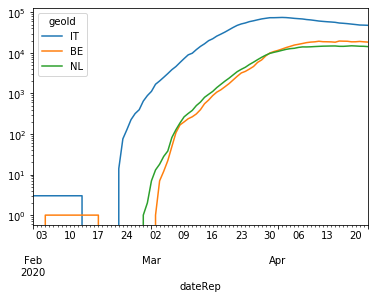

In [13]:
(df_geo['cases'][['IT', 'BE', 'NL']].rolling(14).sum().loc['20200201':]).plot(logy=True)

Let's start with __NL__. We create a dataframe with the non zero cases from the original data and sort by date ascending, which is useful for the visualizations later on.

In [14]:
dg = df[(df['geoId'] == 'NL') & (df['cases'] > 0)].sort_values(['dateRep'])
dg.describe()

,day,month,year,cases,deaths,popData2018
count,56.000000,56.000,56.0,56.000000,56.000000,56.0
mean,14.803571,3.375,2020.0,622.178571,72.392857,17231017.0
std,8.626428,0.558,0.0,454.781390,67.624008,0.0
min,1.000000,2.000,2020.0,1.000000,0.000000,17231017.0
25%,7.750000,3.000,2020.0,118.500000,1.000000,17231017.0
50%,14.500000,3.000,2020.0,731.500000,72.500000,17231017.0
75%,21.250000,4.000,2020.0,1020.750000,132.500000,17231017.0
max,31.000000,4.000,2020.0,1335.000000,234.000000,17231017.0


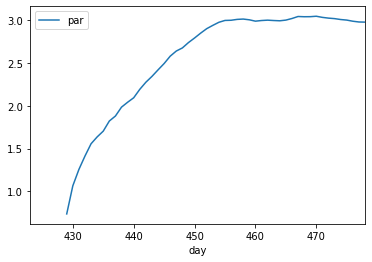

In [15]:
dg['day'] = (dg['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
dg['par'] = np.log10(dg['cases'].rolling(7).mean())

dg.plot(x='day', y='par')

Now we can use polynomial regression to estimate the curve with `polyfit`. We are looking for a parabola, so we use a second order approximation. The outputs are factors a, b, and c for the function `ax^2 + bx + c`. Our fit function cannot handle missing values, so we drop those first.

In [16]:
dn = dg.dropna()
fit = np.polyfit(dn['day'], dn['par'], 2)
print(fit)

[-1.59408117e-03  1.48272163e+00 -3.41673576e+02]


Once we have those, we take the exponential and we get the estimated curve for that time series. The `polyval` function takes the results of `polyfit` and applies them to the input data.

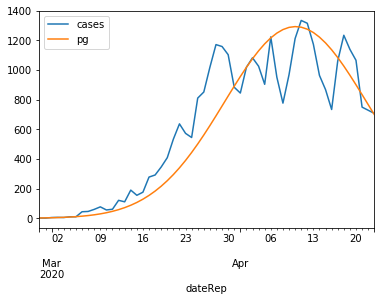

In [17]:
dg['pp'] = np.polyval(fit, dg['day'])
dg['pg'] = 10 ** dg['pp']
dg.plot(x='dateRep', y=['cases', 'pg'])

That shows a decent fit. Lets prepare a prediction by creating a dataframe with future dates and score them.

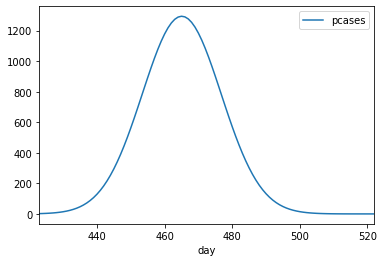

In [18]:
dpred = pd.DataFrame({'day': range(423, 523)})
dpred['pcases'] = 10 ** np.polyval(fit, dpred['day'])
dpred.plot(x='day', y='pcases')

Finally we concatenate the predicted data to the original dataframe so we can use it in our visualizations.

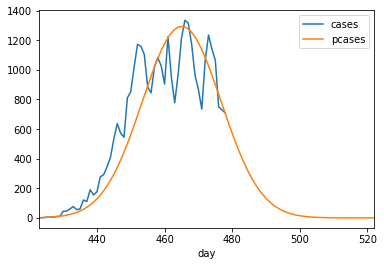

In [19]:
dg = pd.concat([dg, dpred], axis=0, ignore_index=False, sort=True)
dg.plot(x='day', y=['cases', 'pcases'])

Keep exploring! Stay home, wash your hands, keep your distance.